In [2]:
import pandas as pd
import seaborn as sns
import datetime
%matplotlib inline  


In [ ]:
#test=pd.read_csv('../data/processed/test_transactions_agg.csv')
train_2=pd.read_csv('../data/processed/train_transactions_agg_v8.csv')
ht = pd.read_csv('../data/raw/historical_transactions.csv', parse_dates=['purchase_date'])
#nw = pd.read_csv('../data/raw/new_merchant_transactions.csv', parse_dates=['purchase_date'])

In [7]:
train_2.head(1).T

,0
Unnamed: 0,0
first_active_month,2017-06-01
card_id,C_ID_92a2005557
feature_1,5
feature_2,2
feature_3,1
target,-0.820283
hist_card_id_size,260
hist_month_nunique,9
hist_hour_nunique,23


In [8]:
list(train_2.columns)

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_1',
 'feature_2',
 'feature_3',
 'target',
 'hist_card_id_size',
 'hist_month_nunique',
 'hist_hour_nunique',
 'hist_weekofyear_nunique',
 'hist_dayofweek_nunique',
 'hist_year_nunique',
 'hist_month_diff_mean',
 'hist_month_diff_nunique',
 'hist_weekend_sum',
 'hist_weekend_mean',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_state_id_nunique',
 'hist_city_id_nunique',
 'hist_subsector_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_std',
 'hist_installments_sum',
 'hist_installments_mean',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_std',
 'hist_purchase_month_mean',
 'hist_purchase_month_max',
 'hist_purchase_month_min',
 'hist_purchase_month_std',
 'hist_purchase_date_ptp_ptp',
 'hist_purchase_date_min',
 'hist_purchase_date_max',
 'hist_month_lag_min',
 'hist_mont

In [9]:
train_2[['card_id', 'hist_purchase_amount_sum_0']].head()

,card_id,hist_purchase_amount_sum_0
0,C_ID_92a2005557,-15.549885
1,C_ID_3d0044924f,-35.058174
2,C_ID_d639edf6cd,-0.661287
3,C_ID_186d6a6901,-10.755511
4,C_ID_cdbd2c0db2,9.955365


In [ ]:
ht[(ht.card_id == 'C_ID_92a2005557') & (ht.month_lag ==0)]

In [11]:
ht['month_diff'] = ((datetime.datetime.strptime('2018-04-30 23:59:59', '%Y-%m-%d %H:%M:%S') - ht['purchase_date']).dt.days)//30

In [26]:
nw['month_diff'] = ((datetime.datetime.strptime('2018-04-30 23:59:59', '%Y-%m-%d %H:%M:%S') - nw['purchase_date']).dt.days)//30

In [28]:
ht.month_diff.unique()

array([10,  9,  8, 13,  2,  5, 11,  6,  3, 15, 12,  7, 14,  4, 16])

In [27]:
nw.month_diff.unique()

array([ 1,  0,  2,  4,  5,  8,  7,  9,  3,  6, 10, 11, 12, 13, 14])

In [15]:
nw.purchase_date.max()

Timestamp('2018-04-30 23:59:59')

In [16]:
nw.purchase_date.min()

Timestamp('2017-03-01 03:24:51')

In [25]:
nw[nw.month_diff == -1].head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
245775,Y,C_ID_77fd0634b1,136,N,0,A,842,M_ID_066936e35c,2,-0.684112,2018-04-30 23:59:59,4.0,4,37,-1
522042,Y,C_ID_0d0b14e74d,8,N,0,A,842,M_ID_08b7605111,2,-0.686802,2018-04-30 23:59:17,1.0,12,37,-1
802701,Y,C_ID_251e1fe58f,57,N,0,A,307,M_ID_a0eef20623,2,-0.589129,2018-04-30 23:59:07,5.0,5,19,-1
1644276,Y,C_ID_5a05b5e813,19,N,1,B,80,M_ID_2bc04b5299,2,-0.681798,2018-04-30 23:59:38,1.0,9,37,-1
1717490,Y,C_ID_246d26c2bd,69,N,1,B,818,M_ID_5bf40b6a6f,2,0.799320,2018-04-30 23:59:15,1.0,9,12,-1


In [24]:
nw[nw.card_id == 'C_ID_8c9ba46f19']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
47,Y,C_ID_8c9ba46f19,69,N,0,A,561,M_ID_50f575c681,2,0.862552,2017-12-24 15:25:30,1.0,9,7,4
48,Y,C_ID_8c9ba46f19,4,N,0,A,690,M_ID_f85d6b0a06,2,-0.722865,2017-12-14 21:22:11,2.0,10,1,4
49,Y,C_ID_8c9ba46f19,17,N,0,A,195,M_ID_65c0452e8c,1,1.056274,2017-11-12 00:00:00,4.0,22,34,5
50,Y,C_ID_8c9ba46f19,17,N,0,A,278,M_ID_59ec08b5f6,1,-0.368585,2017-11-12 17:01:26,4.0,22,37,5
51,Y,C_ID_8c9ba46f19,17,N,0,A,2,NaN,2,1.597228,2017-12-19 08:07:34,4.0,22,20,4
52,Y,C_ID_8c9ba46f19,4,N,0,A,278,M_ID_c3294a6c4b,2,-0.671775,2017-12-14 11:39:08,2.0,10,37,4
53,Y,C_ID_8c9ba46f19,4,N,0,A,454,M_ID_0a9ad8a715,2,-0.638717,2017-12-14 00:40:57,2.0,10,39,4
54,Y,C_ID_8c9ba46f19,4,N,0,A,80,M_ID_64c00d1e60,2,-0.692812,2017-12-12 04:42:32,2.0,10,37,4
55,Y,C_ID_8c9ba46f19,17,N,0,A,454,M_ID_1516e4c882,2,-0.626696,2017-12-12 09:26:02,4.0,22,39,4
56,Y,C_ID_8c9ba46f19,17,N,0,A,607,M_ID_4748aadbf3,2,0.379735,2017-12-24 12:19:52,4.0,22,29,4


In [22]:
nw.month_lag.unique()

array([1, 2])

In [141]:
d = datetime.datetime.strptime('2018-04-30 23:59', '%Y-%m-%d %H:%M')
print(d)

2018-04-30 23:59:00


In [111]:
ht['month_diff'] = ((datetime.datetime.today() - ht['purchase_date']).dt.days)//30
ht['month_diff_feature'] = ht['month_diff'] + ht['month_lag']

In [118]:
ht.shape

(29112361, 17)

In [114]:
temp = ht.groupby('card_id')['purchase_date'].max().reset_index()

In [117]:
ht = pd.merge(ht, temp, on='card_id', how='left')

In [133]:
ht.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date_x,category_2,state_id,subsector_id,month_diff,month_diff_feature,purchase_date_y,month_lag_c,month_diff_f_c
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,20,12,2018-02-28 17:00:08,-8,12
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,19,12,2018-02-28 17:00:08,-7,12
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,18,12,2018-02-28 17:00:08,-6,12
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,18,13,2018-02-28 17:00:08,-5,12
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,23,12,2018-02-28 17:00:08,-11,12


In [131]:
ht['month_lag_c'] = (ht['purchase_date_x'] - ht['purchase_date_y']).dt.days//30+1

In [129]:
ht[ht.month_lag_c != ht.month_lag].head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date_x,category_2,state_id,subsector_id,month_diff,month_diff_feature,purchase_date_y,month_lag_c
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37,21,13,2018-02-28 17:00:08,-9
21,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-7,-0.737967,2017-07-01 21:27:23,1.0,16,37,20,13,2018-02-28 17:00:08,-8
61,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-4,-0.721528,2017-10-01 14:36:11,1.0,16,16,17,13,2018-02-28 17:00:08,-5
68,Y,C_ID_4e6213e9bc,88,N,0,A,111,M_ID_83367527c8,-11,-0.701979,2017-03-03 23:54:45,1.0,16,36,24,13,2018-02-28 17:00:08,-12
111,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-6,-0.734887,2017-08-01 12:59:09,1.0,16,37,19,13,2018-02-28 17:00:08,-7


In [132]:
ht['month_diff_f_c'] = ((datetime.datetime.today() - ht['purchase_date_y']).dt.days)//30

In [44]:
train=pd.read_csv('../data/raw/train.csv')

In [40]:
list(train_2.columns)

['Unnamed: 0',
 'first_active_month',
 'card_id',
 'feature_1',
 'feature_2',
 'feature_3',
 'target',
 'hist_card_id_size',
 'hist_month_nunique',
 'hist_hour_nunique',
 'hist_weekofyear_nunique',
 'hist_dayofweek_nunique',
 'hist_year_nunique',
 'hist_month_diff_mean',
 'hist_month_diff_nunique',
 'hist_weekend_sum',
 'hist_weekend_mean',
 'hist_merchant_id_nunique',
 'hist_merchant_category_id_nunique',
 'hist_state_id_nunique',
 'hist_city_id_nunique',
 'hist_subsector_id_nunique',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_mean',
 'hist_purchase_amount_max',
 'hist_purchase_amount_min',
 'hist_purchase_amount_std',
 'hist_installments_sum',
 'hist_installments_mean',
 'hist_installments_max',
 'hist_installments_min',
 'hist_installments_std',
 'hist_purchase_month_mean',
 'hist_purchase_month_max',
 'hist_purchase_month_min',
 'hist_purchase_month_std',
 'hist_purchase_date_ptp_ptp',
 'hist_purchase_date_min',
 'hist_purchase_date_max',
 'hist_month_lag_min',
 'hist_mont

In [49]:
ht[ht.card_id == 'C_ID_92a2005557'].shape

(260, 14)

In [51]:
ht[ht.card_id == 'C_ID_92a2005557'].month_lag.unique()

array([-3, -7, -6, -2, -1, -5,  0, -4, -8])

In [62]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [45]:
train[train.card_id == 'C_ID_92a2005557']

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283


In [48]:
train_2[train_2.card_id == 'C_ID_92a2005557'].T

,0
Unnamed: 0,0
first_active_month,2017-06-01
card_id,C_ID_92a2005557
feature_1,5
feature_2,2
feature_3,1
target,-0.820283
hist_card_id_size,260
hist_month_nunique,9
hist_hour_nunique,23


In [53]:
train_2[train_2.hist_month_diff_mean == 24.75]

,Unnamed: 0,first_active_month,card_id,feature_1,feature_2,feature_3,target,hist_card_id_size,hist_month_nunique,hist_hour_nunique,...,new_installments_std_1,new_installments_std_2,dayofweek,weekofyear,month,elapsed_time,hist_first_buy,new_first_buy,card_id_total,purchase_amount_total
94299,94299,2015-12-01,C_ID_c9a48bf3bf,5,1,1,2.701092,8,2,4,...,NaN,NaN,1,49,12,1181,399,471.0,9.0,5.356801


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
27239585,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 15:56:31,3.0,7,18,26
27239586,Y,C_ID_c9a48bf3bf,190,N,3,C,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 13:59:58,3.0,7,18,26
27239587,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,-0.344197,2017-01-03 15:56:37,3.0,7,18,26
27239588,Y,C_ID_c9a48bf3bf,20,N,1,B,307,M_ID_c857c7a1e3,0,-0.596643,2017-02-09 21:13:43,3.0,19,19,24
27239589,Y,C_ID_c9a48bf3bf,142,N,3,C,363,M_ID_6706245fb0,-1,0.755743,2017-01-04 15:56:03,3.0,19,18,26
27239590,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 15:56:34,3.0,7,18,26
27239591,N,C_ID_c9a48bf3bf,69,N,3,C,511,M_ID_00a6ca8a8a,-1,-0.070715,2017-01-04 19:01:56,1.0,9,7,26
27239592,Y,C_ID_c9a48bf3bf,20,N,1,B,307,M_ID_c857c7a1e3,-1,-0.596643,2017-01-19 21:19:45,3.0,19,19,25


In [63]:
ht[ht.card_id == 'C_ID_c9a48bf3bf']


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
27239585,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 15:56:31,3.0,7,18,26
27239586,Y,C_ID_c9a48bf3bf,190,N,3,C,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 13:59:58,3.0,7,18,26
27239587,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,-0.344197,2017-01-03 15:56:37,3.0,7,18,26
27239588,Y,C_ID_c9a48bf3bf,20,N,1,B,307,M_ID_c857c7a1e3,0,-0.596643,2017-02-09 21:13:43,3.0,19,19,24
27239589,Y,C_ID_c9a48bf3bf,142,N,3,C,363,M_ID_6706245fb0,-1,0.755743,2017-01-04 15:56:03,3.0,19,18,26
27239590,Y,C_ID_c9a48bf3bf,190,N,1,B,373,M_ID_a57a9381cd,-1,1.902266,2017-01-03 15:56:34,3.0,7,18,26
27239591,N,C_ID_c9a48bf3bf,69,N,3,C,511,M_ID_00a6ca8a8a,-1,-0.070715,2017-01-04 19:01:56,1.0,9,7,26
27239592,Y,C_ID_c9a48bf3bf,20,N,1,B,307,M_ID_c857c7a1e3,-1,-0.596643,2017-01-19 21:19:45,3.0,19,19,25


In [87]:
ht[ht.month_lag == -1].purchase_date.dt.month.unique() 

array([ 1, 11, 12,  7,  8, 10,  4,  6,  9,  3,  5,  2])

In [91]:
ht[ht.month_lag == -2].purchase_date.min()

Timestamp('2017-01-01 00:09:11')

In [92]:
ht[(ht.month_lag == -2) & (ht.purchase_date == '2017-01-01 00:09:11')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
25395671,Y,C_ID_4ee7fe25ca,331,N,0,A,637,M_ID_57242d3483,-2,-0.679288,2017-01-01 00:09:11,1.0,16,37,26


In [93]:
ht['purchase_month'] = ht['purchase_date'].dt.month

In [94]:
ht.groupby(['month_lag', 'purchase_month']).size()

month_lag  purchase_month
-13        1                  689097
-12        1                   73787
           2                  718186
-11        1                   57232
           2                   78300
           3                  872346
-10        1                   44205
           2                   60989
           3                   95132
           4                  884727
-9         1                   34741
           2                   46693
           3                   74759
           4                   98178
           5                  980353
-8         1                   37916
           2                   37751
           3                   57195
           4                   78447
           5                  108172
           6                 1108365
-7         1                   34350
           2                   39462
           3                   45629
           4                   58222
           5                   86638
           6

In [105]:
ht[(ht.month_lag == -12) & (ht.purchase_month == 2)]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff,purchase_month
57,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-12,-0.730379,2017-02-14 12:54:39,1.0,16,37,24,2
114,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-12,-0.737141,2017-02-15 09:36:59,1.0,16,37,24,2
128,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-12,-0.728876,2017-02-07 13:01:28,1.0,16,37,24,2
146,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-12,-0.730379,2017-02-15 12:53:48,1.0,16,37,24,2
181,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-12,-0.726216,2017-02-07 22:06:00,1.0,16,16,24,2
308,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-12,-0.743602,2017-02-07 07:34:20,1.0,16,37,24,2
355,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-12,-0.738087,2017-02-21 10:03:11,1.0,16,34,24,2
586,Y,C_ID_0e171c1b48,277,N,0,A,68,M_ID_bf8f6ad79b,-12,-0.566590,2017-02-25 09:38:46,4.0,13,27,24,2
599,N,C_ID_0e171c1b48,277,N,0,A,68,M_ID_bf8f6ad79b,-12,-0.566590,2017-02-25 09:46:33,4.0,13,27,24,2
615,N,C_ID_0e171c1b48,277,N,0,A,68,M_ID_bf8f6ad79b,-12,-0.566590,2017-02-25 09:40:21,4.0,13,27,24,2


In [109]:
ht[(ht.card_id == 'C_ID_4e6213e9bc') & (ht.month_lag == -12)].purchase_date.max()

Timestamp('2017-02-21 10:03:11')

In [107]:
ht[ht.card_id == 'C_ID_4e6213e9bc'].purchase_date.max()

Timestamp('2018-02-28 17:00:08')

In [71]:
ht.month_lag.min()

-13

In [ ]:
ht[(ht.month_lag == -12)]

In [64]:
ht[ht.card_id == 'C_ID_92a2005557']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,month_diff
12454872,Y,C_ID_92a2005557,69,N,0,A,195,M_ID_cc72dac895,-3,-0.506033,2017-11-25 16:37:11,1.0,9,34,15
12454873,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_c9c0f1cb3f,-7,-0.722114,2017-07-16 12:21:00,1.0,9,37,19
12454874,Y,C_ID_92a2005557,69,N,0,A,683,M_ID_36f9e41993,-6,-0.726171,2017-08-10 21:01:16,1.0,9,34,18
12454875,Y,C_ID_92a2005557,69,N,0,A,309,M_ID_b790230ee9,-2,-0.610167,2017-12-15 12:06:58,1.0,9,21,14
12454876,Y,C_ID_92a2005557,69,N,0,A,278,M_ID_ab67f6c982,-7,-0.307232,2017-07-08 15:13:18,1.0,9,37,19
12454877,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_b3c49066d8,-6,-0.662158,2017-08-13 13:43:07,1.0,9,34,18
12454878,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_b3c49066d8,-1,-0.665614,2018-01-27 06:44:29,1.0,9,34,13
12454879,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_b3c49066d8,-7,-0.727944,2017-07-01 09:02:20,1.0,9,34,20
12454880,Y,C_ID_92a2005557,69,N,0,A,80,M_ID_c124c4467a,-5,-0.620986,2017-09-02 23:05:56,1.0,9,37,17
12454881,Y,C_ID_92a2005557,69,N,0,A,560,M_ID_1a81c358a3,-7,-0.722114,2017-07-27 08:17:48,1.0,9,34,19


In [61]:
ht.month_lag.min()

-13

In [25]:
train['class'] = 0
train.loc[train.target < -1, 'class'] = 1
train.loc[train.target > 1, 'class'] = 2

In [26]:
train.groupby('class').size()

class
0    115356
1     45661
2     40900
dtype: int64

In [5]:
cols = [col for col in train.columns if col not in ['first_active_month', 'card_id', 'target', 'Unnamed: 0']]
X=train[cols]

In [6]:
X.head()

,feature_1,feature_2,feature_3,hist_merchant_id_nunique,hist_merchant_category_id_nunique,hist_state_id_nunique,hist_city_id_nunique,hist_subsector_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,...,new_category_2_4.0_mean,new_category_2_4.0_sum,new_category_2_5.0_mean,new_category_2_5.0_sum,new_category_3_A_mean,new_category_3_A_sum,new_category_3_B_mean,new_category_3_B_sum,new_category_3_C_mean,new_category_3_C_sum
0,5,2,1,94,41,3,7,21,-165.968739,-0.638341,...,0.000000,0.0,0.0,0.0,1.0,23.0,0.000000,0.0,0.000000,0.0
1,4,1,0,142,57,3,9,24,-210.006336,-0.600018,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,6.0,0.000000,0.0
2,2,2,0,13,8,2,5,7,-29.167391,-0.678311,...,0.000000,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.000000,0.0
3,4,3,0,50,25,5,7,13,-49.491364,-0.642745,...,0.857143,6.0,0.0,0.0,0.0,0.0,0.857143,6.0,0.000000,0.0
4,1,3,0,66,26,6,6,17,-48.687656,-0.366073,...,0.694444,25.0,0.0,0.0,0.0,0.0,0.944444,34.0,0.027778,1.0


In [18]:
sub=pd.read_csv('../data/processed/submission_1.csv')

In [19]:
sub.head(10)

,card_id,target
0,C_ID_0ab67a22ab,-2.990987
1,C_ID_130fd0cbdd,-0.268015
2,C_ID_b709037bc5,-0.969265
3,C_ID_d27d835a9f,-0.194324
4,C_ID_2b5e3df5c2,-1.065861
5,C_ID_5814b4f13c,0.302430
6,C_ID_a1b3c75277,0.104179
7,C_ID_f7cada36d3,0.178176
8,C_ID_9d2bc8dfc4,-0.707250
9,C_ID_6d8dba8475,-0.445870


In [20]:
sub.target.describe()

count    123623.000000
mean         -0.391186
std           1.137365
min         -15.501247
25%          -0.659396
50%          -0.202811
75%           0.161143
max           2.871851
Name: target, dtype: float64

/home/neha/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


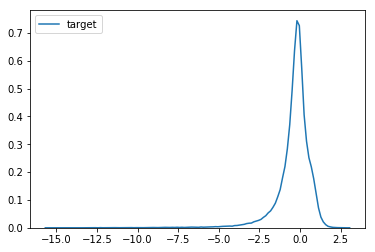

In [24]:
sns.kdeplot(sub.target)

In [25]:
a=[1, 2, 3]
b=a
b.append('6')
a[0]=5


In [18]:
a.copy()

[5, 2, 3, '6']

In [28]:
import random
print(b)
random.shuffle(b)
print(b)

[2, 5, 3, '6']
['6', 5, 2, 3]


In [29]:
len(['feature_1', 'feature_2', 'feature_3', 'hist_card_id_size', 'hist_month_nunique', 'hist_hour_nunique', 'hist_weekofyear_nunique', 'hist_year_nunique', 'hist_month_diff_mean', 'hist_month_diff_nunique', 'hist_weekend_sum', 'hist_weekend_mean', 'hist_merchant_id_nunique', 'hist_merchant_category_id_nunique', 'hist_state_id_nunique', 'hist_city_id_nunique', 'hist_subsector_id_nunique', 'hist_purchase_amount_mean', 'hist_purchase_amount_max', 'hist_purchase_amount_min', 'hist_installments_sum', 'hist_installments_mean', 'hist_installments_max', 'hist_purchase_month_std', 'hist_purchase_date_max', 'hist_month_lag_min', 'hist_month_lag_max', 'hist_month_lag_mean', 'hist_month_lag_std', 'hist_authorized_flag_mean', 'hist_authorized_flag_sum', 'hist_category_1_mean', 'hist_category_1_sum', 'hist_category_2_1.0_mean', 'hist_category_2_2.0_mean', 'hist_category_2_2.0_sum', 'hist_merchant_id_nunique_0', 'hist_merchant_id_count_-10', 'hist_merchant_id_count_-9', 'hist_merchant_id_count_-2', 'hist_merchant_id_count_0', 'hist_state_id_nunique_-5', 'hist_state_id_nunique_-4', 'hist_state_id_nunique_-1', 'hist_state_id_nunique_0', 'hist_subsector_id_nunique_-12', 'hist_purchase_amount_max_-2', 'hist_installments_sum_-6', 'hist_installments_sum_-4', 'hist_installments_sum_0', 'new_card_id_size', 'new_month_nunique', 'new_hour_nunique', 'new_purchase_amount_sum', 'new_purchase_amount_mean', 'new_purchase_amount_max', 'new_purchase_amount_min', 'new_purchase_amount_std', 'new_installments_sum', 'new_purchase_month_mean', 'new_purchase_month_max', 'new_purchase_date_ptp_ptp', 'new_purchase_date_min', 'new_purchase_date_max', 'new_month_lag_min', 'new_month_lag_max', 'new_category_1_mean', 'new_category_1_sum', 'new_category_2_1.0_mean', 'new_category_2_1.0_sum', 'new_category_2_3.0_sum', 'new_category_3_A_sum', 'new_category_3_B_mean']
)

73